# Relevant Article Acquisition

In [1]:
import pandas as pd
from collections import Counter
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import time
import re
import math
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [2]:
#Reading Articles data from .csv files.
articles1 = pd.read_csv('articles1.csv');
articles2 = pd.read_csv('articles2.csv');
articles3 = pd.read_csv('articles3.csv');

In [3]:
#Checking no.of data points in each dataset.
print('Data points in Articles1 file : ', articles1.shape[0], 'and Number of fields in Articles1 file : ', articles1.shape[1]);
print('Data points in Articles2 file : ', articles2.shape[0], 'and Number of fields in Articles2 file : ', articles2.shape[1]);
print('Data points in Articles3 file : ', articles3.shape[0], 'and Number of fields in Articles3 file : ', articles3.shape[1]);

Data points in Articles1 file :  50000 and Number of fields in Articles1 file :  10
Data points in Articles2 file :  49999 and Number of fields in Articles2 file :  10
Data points in Articles3 file :  42571 and Number of fields in Articles3 file :  10


In [4]:
frames = [articles1, articles2, articles3];

In [5]:
#Concat three datasets into one dataset
dataset = pd.concat(frames);

In [6]:
dataset.columns

Index(['Unnamed: 0', 'id', 'title', 'publication', 'author', 'date', 'year',
       'month', 'url', 'content'],
      dtype='object')

In [7]:
print('Total Data points : ', dataset.shape[0], 'and Number of fields : ', dataset.shape[1]);

Total Data points :  142570 and Number of fields :  10


In [8]:
dataset.head(10)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
5,5,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b..."
6,6,17289,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,2017.0,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...
7,7,17290,"After ‘The Biggest Loser,’ Their Bodies Fought...",New York Times,Gina Kolata,2017-02-08,2017.0,2.0,NaN,"Danny Cahill stood, slightly dazed, in a blizz..."
8,8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
9,9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...


In [11]:
data = dataset[['id', 'title', 'publication', 'author', 'date', 'url', 'content']];

In [ ]:
dataView.head()

In [12]:
print(data['title'].describe())

count                             142568
unique                            142132
top       The Atlantic’s Week in Culture
freq                                  12
Name: title, dtype: object


In [13]:
print(data['publication'].describe())

count        142570
unique           15
top       Breitbart
freq          23781
Name: publication, dtype: object


In [14]:
print(data['publication'].unique())

['New York Times' 'Breitbart' 'CNN' 'Business Insider' 'Atlantic'
 'Fox News' 'Talking Points Memo' 'Buzzfeed News' 'National Review'
 'New York Post' 'Guardian' 'NPR' 'Reuters' 'Vox' 'Washington Post']


In [15]:
publication_count = Counter(list(data['publication']))
publication_count.most_common(10)

[('Breitbart', 23781),
 ('New York Post', 17493),
 ('NPR', 11992),
 ('CNN', 11488),
 ('Washington Post', 11114),
 ('Reuters', 10710),
 ('Guardian', 8681),
 ('New York Times', 7803),
 ('Atlantic', 7179),
 ('Business Insider', 6757)]

In [16]:
print(data['author'].describe())

count             126694
unique             15647
top       Breitbart News
freq                1559
Name: author, dtype: object


In [17]:
author_count = Counter(list(data['author']))
author_count.most_common(10)

[(nan, 15876),
 ('Breitbart News', 1559),
 ('Pam Key', 1282),
 ('Associated Press', 1231),
 ('Charlie Spiering', 928),
 ('Jerome Hudson', 806),
 ('John Hayward', 747),
 ('Daniel Nussbaum', 735),
 ('AWR Hawkins', 720),
 ('Ian Hanchett', 647)]

In [18]:
print(data['date'].describe())

count         139929
unique          1646
top       2017-02-03
freq             402
Name: date, dtype: object


In [19]:
date_count = Counter(list(data['date']))
date_count.most_common(10)

[(nan, 2641),
 ('2017-02-03', 402),
 ('2017-04-13', 400),
 ('2016-08-22', 389),
 ('2017-04-14', 387),
 ('2017-04-07', 386),
 ('2017-04-05', 380),
 ('2017-04-06', 380),
 ('2017-01-13', 377),
 ('2017-02-10', 374)]

In [20]:
print(data['url'].describe())

count                                                 85559
unique                                                85559
top       https://web.archive.org/web/20170524012009/htt...
freq                                                      1
Name: url, dtype: object


In [21]:
url_count = Counter(list(data['url']))
url_count.most_common(5)

[(nan, 57011),
 ('https://web.archive.org/web/20160101000951/http://www.foxnews.com/world/2015/12/31/fire-tears-through-dubai-building-near-planned-fireworks-show.html\n',
  1),
 ('https://web.archive.org/web/20160101000951/http://www.foxnews.com/politics/2015/12/31/top-carson-campaign-staffers-resign.html\n',
  1),
 ('https://web.archive.org/web/20160101000951/http://www.foxnews.com/politics/2015/12/31/democrat-martin-omalley-fails-to-qualify-for-ohios-primary-ballot.html\n',
  1),
 ('https://web.archive.org/web/20160101000951/http://www.foxnews.com/politics/2015/12/31/brawl-breaks-out-in-gop-race-below-trump-tier.html?intcmp=hplnws\n',
  1)]

In [22]:
print(data['content'].describe())

count            142570
unique           142038
top       advertisement
freq                 42
Name: content, dtype: object


In [23]:
content_count = Counter(list(data['content']))
content_count.most_common(5)

[('advertisement', 42),
 ('’’', 25),
 ('   ', 15),
 (', I want to receive updates from partners and sponsors. ', 11),
 ('        For us to continue writing great stories, we need to display ads.             Please select the extension that is blocking ads.     Please follow the steps below',
  10)]

Saving articles dataset in pickle files.

In [ ]:
#saveDataToPickle = open("pickles/142k_articles_data.pickle", "wb")
#pickle.dump(data, saveDataToPickle)
#saveDataToPickle.close()
with open('pickles/142k_articles_data.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data = data.loc[~data['url'].isnull()]
print("Total Data points after url = NaN eliminated : ", data.shape[0])

In [ ]:
with open('pickles/85k_articles_eliminate_urlNaN.pickle', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data = data.loc[~data['date'].isnull()]
print("Total Data points after date = NaN eliminated : ", data.shape[0])

In [ ]:
with open('pickles/82k_articles_eliminate_dateNaN.pickle', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
data = data.loc[~data['author'].isnull()]
print("Total Data points after author = NaN eliminated : ", data.shape[0])

In [ ]:
#saveDataToPickle = open("pickles/75k_articles_eliminate_NaNs.pickle", "wb")
#pickle.dump(data, saveDataToPickle)
#saveDataToPickle.close()
with open('pickles/75k_articles_eliminate_NaNs.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
#Loading 75k articles pickle file.
#import pickle
#pickle_in = open("pickles/75k_articles_eliminate_NaNs.pickle", "rb")
#data = pickle.load(open("pickles/75k_articles_eliminate_NaNs.pickle", "rb"))

with open('pickles/75k_articles_eliminate_NaNs.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data = pickle.load(f)

### Removing Duplicates in 75k Dataset

In [ ]:
data.head()

In [ ]:
data = data.head(10000)
data.shape[0]

In [ ]:
print(sum(data.duplicated('title')))

### Text Pre-Processing

In [ ]:
#Stop words removal from title.
stop_words = set(stopwords.words('english'))
print('List of Stop words in English : ', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            #Removing special chars like '~!@#$%^&*()_+<>' etc
            word = ("".join(e for e in words if e.isalnum()))
            #Convert into lower case
            word = word.lower()
            #Stop words removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

In [ ]:
start_time = time.clock()
# we take each title and we text-preprocess it.
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')
# we print the time it took to preprocess whole titles 
print(time.clock() - start_time, "seconds")

In [ ]:
data.shape[0]

In [ ]:
#with open('pickles/1k_articlesForTestingPurpose.pickle', 'wb') as f:
#pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
    
with open('pickles/10k_articles_titles_NaNStopwords.pickle', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

## 1k pickle file loading for Testing Purpose

In [24]:
with open('pickles/1k_articlesForTestingPurpose.pickle', 'rb') as f:
    data = pickle.load(f)

In [25]:
#print(data.shape[0])
print("After Text preprocessing on title column")
data.head(10)

After Text preprocessing on title column


,id,title,publication,author,date,url,content
7012,82596,donald trump blasts bill clinton one great abu...,Fox News,Christopher Snyder,2015-12-30,https://web.archive.org/web/20160101000951/htt...,Donald Trump launched new attacks against Bil...
7016,82600,drop oil prices rocks producer states triggers...,Fox News,Brooke Singman,2016-01-01,https://web.archive.org/web/20160102032517/htt...,The plunge in oil prices has given a needed b...
7020,82605,open carry comes texas lone star state safer 2...,Fox News,John R Lott,2015-12-30,https://web.archive.org/web/20160102032517/htt...,"With about 900, 000 concealed handgun permit ..."
7034,82621,gop field rips obamas move toward executive ac...,Fox News,Joseph Weber,2016-01-03,https://web.archive.org/web/20160104001421/htt...,Republican presidential candidates are attack...
7042,82630,president obama wants disarm america,Fox News,Todd Starnes,2016-01-04,https://web.archive.org/web/20160105014544/htt...,President Obama is plotting with his attorney...
7043,82631,rancher family reports prison endorse oregon s...,Fox News,Hollie McKay,2016-01-04,https://web.archive.org/web/20160105014544/htt...,As armed protesters occupied buildings on a f...
7048,82637,shia problem,Fox News,Michael Desch,2016-01-04,https://web.archive.org/web/20160105014544/htt...,Saudi Arabia’s execution of Shia cleric Nimr ...
7050,82639,country musics saddest stories 2015,Fox News,Sasha Bogursky,2015-12-22,https://web.archive.org/web/20160105014544/htt...,2015 was a tough year for country music. From ...
7061,82651,obamas small ball guns could big deal,Fox News,Chris Stirewalt,2016-01-05,https://web.archive.org/web/20160106000153/htt...,**Want FOX News First in your inbox every day...
7063,82653,martha maccallum gun violence tears lost child...,Fox News,Martha MacCallum,2016-01-05,https://web.archive.org/web/20160106000153/htt...,The president shed tears Tuesday at the White...


In [26]:
#Utlity functions that we are use to Execute

def plot_heatmap(keys, values, labels, text):
    #keys = list of words of recommended title
    # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        #gs = gridspec.GridSpec(2, 2, width_ratio = [4,1], height_ratio = [4,1]) 
        gs = gridspec.GridSpec(1, 1) 
        fig = plt.figure(figsize=(25,3))
    
        ax = plt.subplot(gs[0])
        ax = sns.heatmap(np.array([values]), annot = np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # article title
    
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, text, model):
    # doc_id : index of the title1
    # vec1 : input article's vector, it is of a dict type {word:count}
    # vec2 : recommended articles's vector, it is of a dict type {word:count}
    # text: title of recomonded article (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 
    
    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i] = 0
    
    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    plot_heatmap(keys, values, labels, text)
    

# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}


def get_result(doc_id, content_a, content_b, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, text2, model)


## [1] Bag of Words approach (BoW) article similarity

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features = title_vectorizer.fit_transform(data['title'])
title_features.get_shape()

(1000, 3394)

20


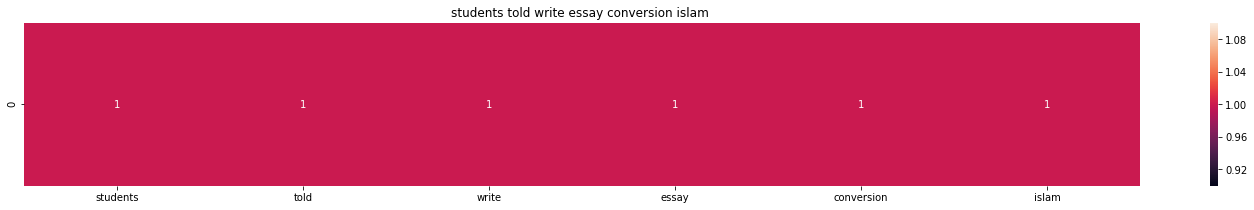

ID :  83260
Title :  students told write essay conversion islam 
Publication :  Fox News
Author :  Todd Starnes
Euclidean similarity with the query article : 0.0


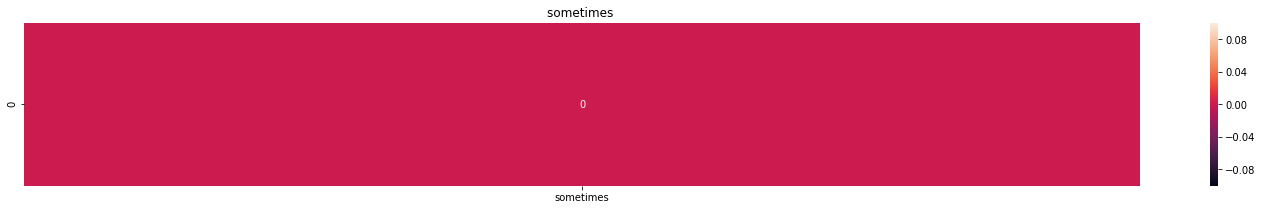

ID :  86826
Title :  sometimes 
Publication :  Fox News
Author :  Chris Stirewalt
Euclidean similarity with the query article : 2.64575131106


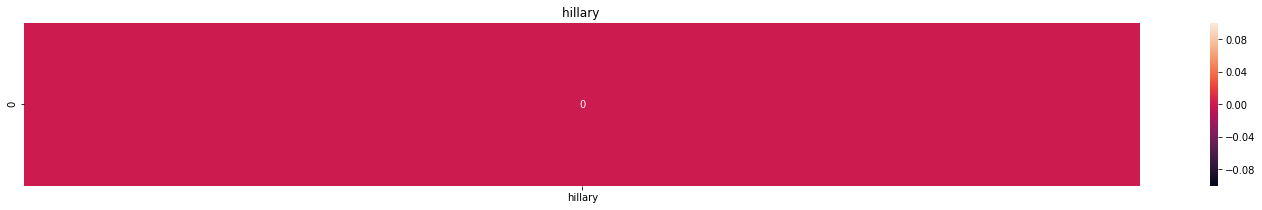

ID :  86160
Title :  hillary 
Publication :  Fox News
Author :  Chris Stirewalt
Euclidean similarity with the query article : 2.64575131106


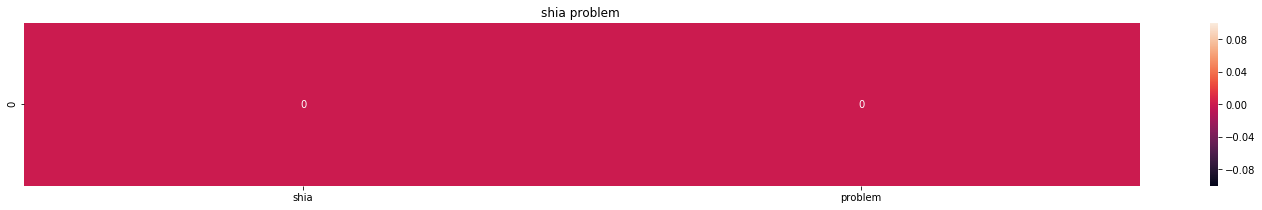

ID :  82637
Title :  shia problem 
Publication :  Fox News
Author :  Michael Desch
Euclidean similarity with the query article : 2.82842712475


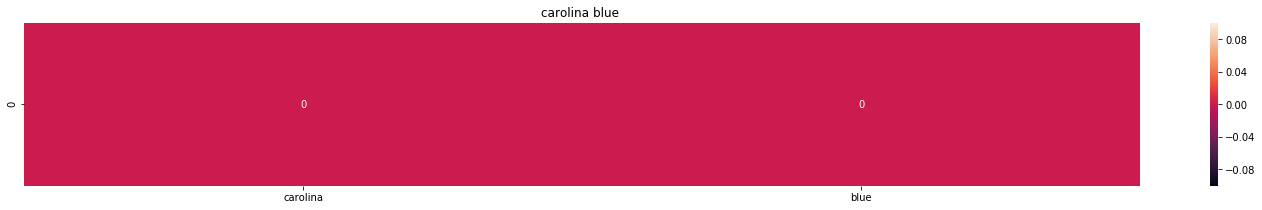

ID :  85911
Title :  carolina blue 
Publication :  Fox News
Author :  Chris Stirewalt
Euclidean similarity with the query article : 2.82842712475


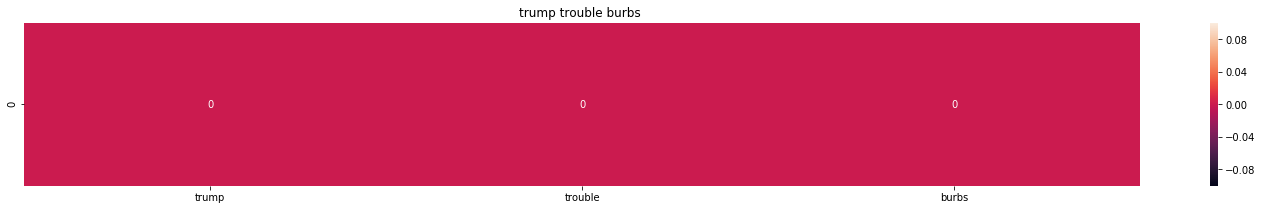

ID :  84921
Title :  trump trouble burbs 
Publication :  Fox News
Author :  Dan Springer
Euclidean similarity with the query article : 3.0


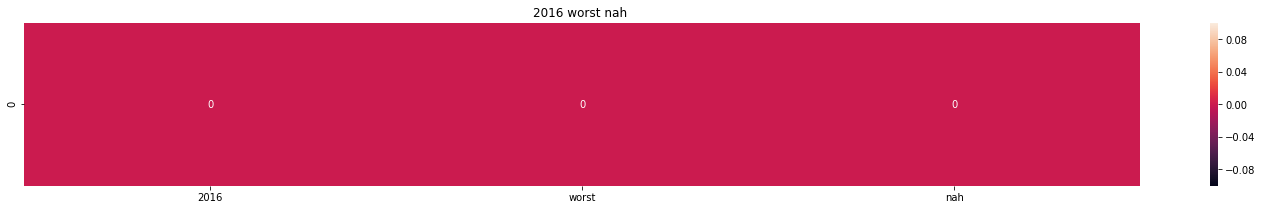

ID :  85728
Title :  2016 worst nah 
Publication :  Fox News
Author :  Chris Stirewalt
Euclidean similarity with the query article : 3.0


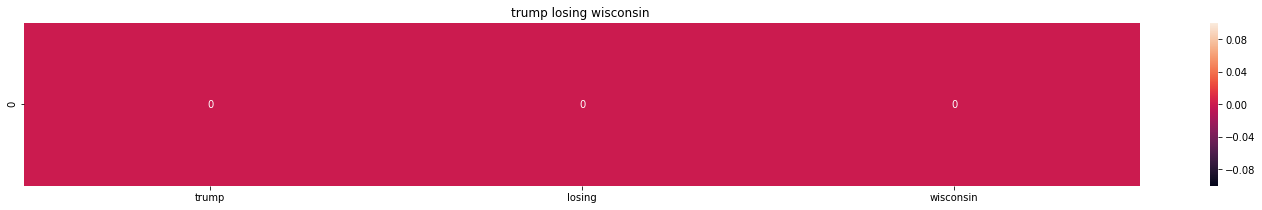

ID :  83777
Title :  trump losing wisconsin 
Publication :  Fox News
Author :  Chris Stirewalt
Euclidean similarity with the query article : 3.0


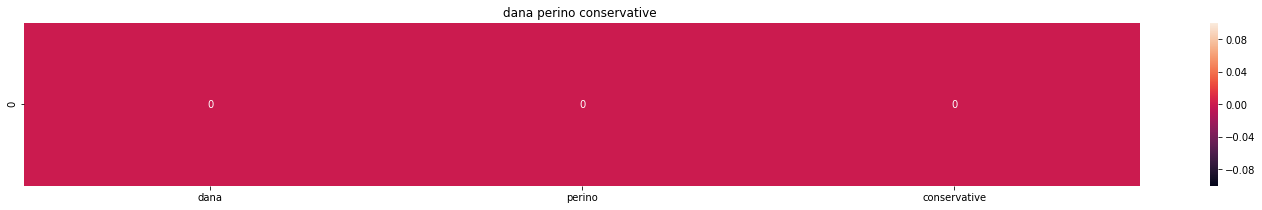

ID :  84353
Title :  dana perino conservative 
Publication :  Fox News
Author :  Dana Perino
Euclidean similarity with the query article : 3.0


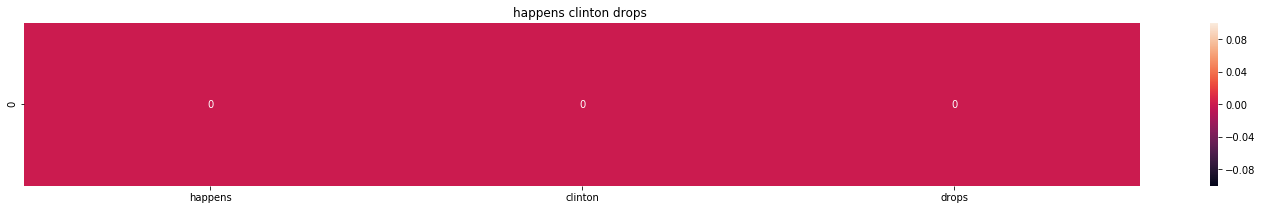

ID :  85976
Title :  happens clinton drops 
Publication :  Fox News
Author :  Adam Shaw
Euclidean similarity with the query article : 3.0


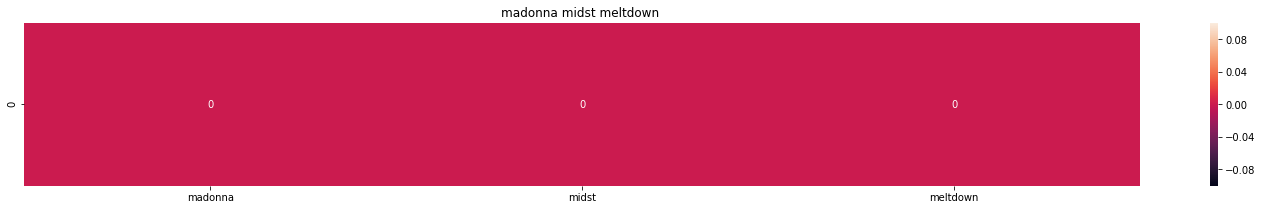

ID :  83705
Title :  madonna midst meltdown 
Publication :  Fox News
Author :  Blanche Johnson
Euclidean similarity with the query article : 3.0


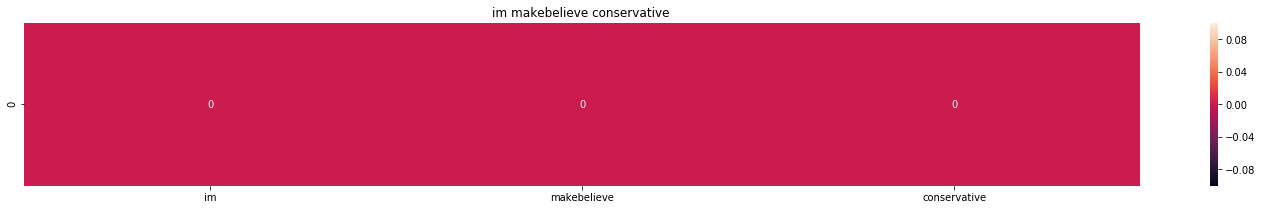

ID :  82916
Title :  im makebelieve conservative 
Publication :  Fox News
Author :  Todd Starnes
Euclidean similarity with the query article : 3.0


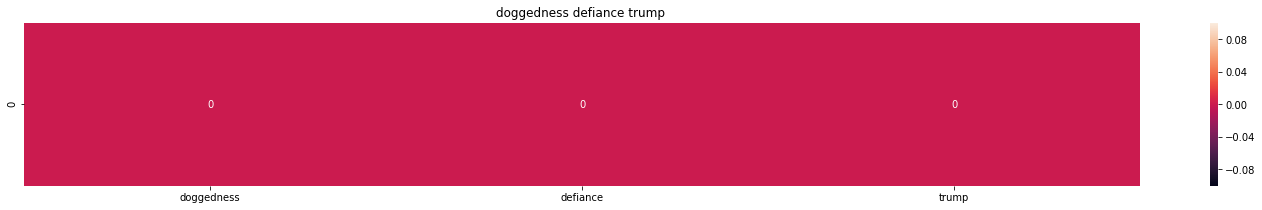

ID :  86817
Title :  doggedness defiance trump 
Publication :  Fox News
Author :  Howard Kurtz
Euclidean similarity with the query article : 3.0


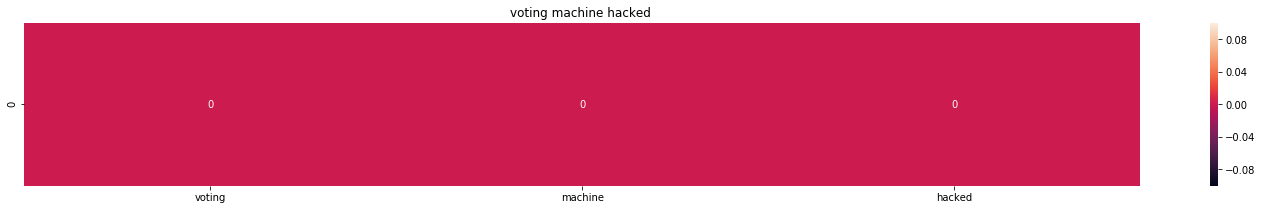

ID :  86085
Title :  voting machine hacked 
Publication :  Fox News
Author :  Eric Shawn
Euclidean similarity with the query article : 3.0


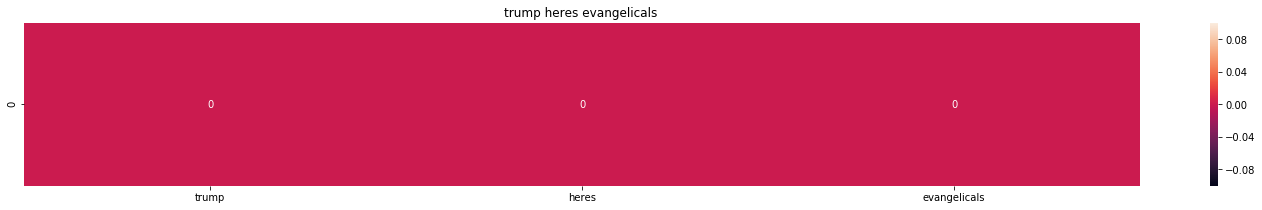

ID :  84174
Title :  trump heres evangelicals 
Publication :  Fox News
Author :  Bruce Ashford
Euclidean similarity with the query article : 3.0


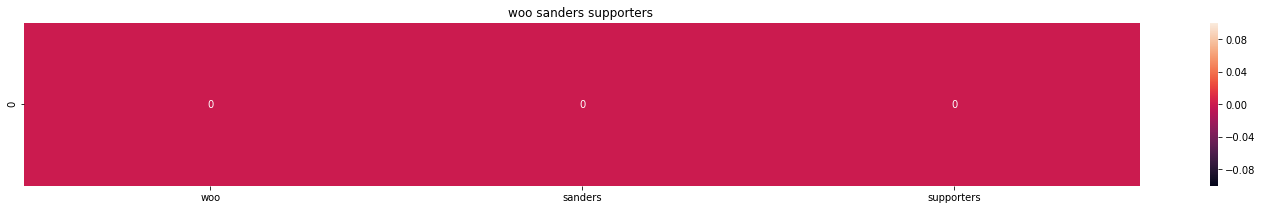

ID :  84629
Title :  woo sanders supporters 
Publication :  Fox News
Author :  Adam Shaw
Euclidean similarity with the query article : 3.0


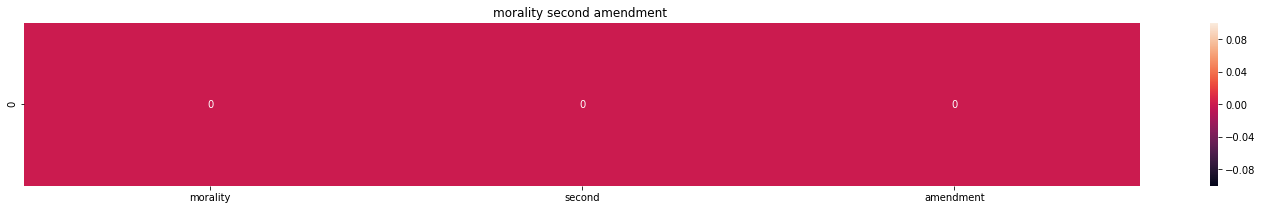

ID :  85371
Title :  morality second amendment 
Publication :  Fox News
Author :  Blaine Winship
Euclidean similarity with the query article : 3.0


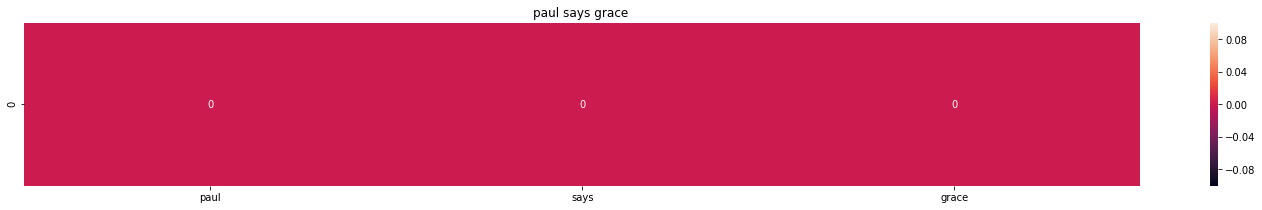

ID :  82992
Title :  paul says grace 
Publication :  Fox News
Author :  Chris Stirewalt
Euclidean similarity with the query article : 3.0


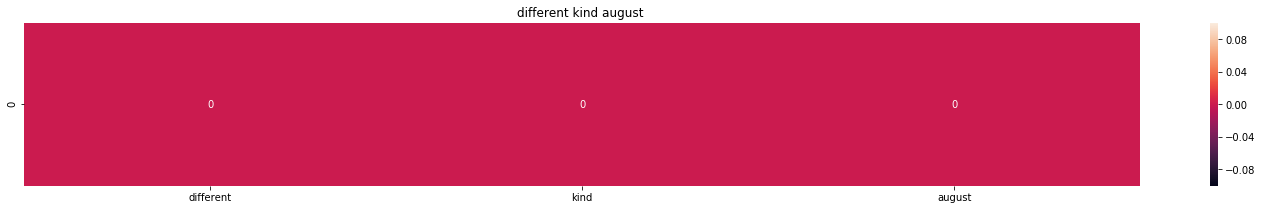

ID :  85565
Title :  different kind august 
Publication :  Fox News
Author :  Chris Stirewalt
Euclidean similarity with the query article : 3.0


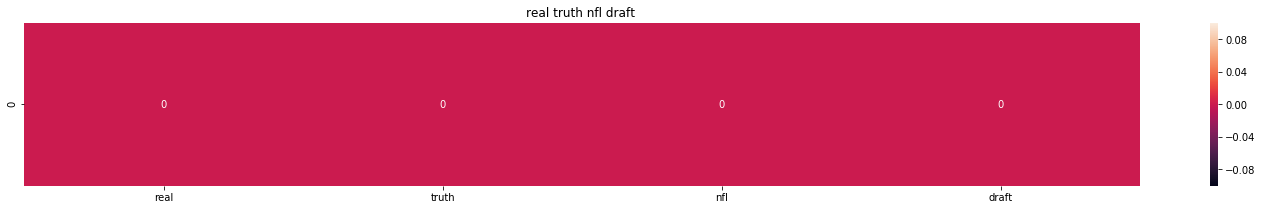

ID :  84131
Title :  real truth nfl draft 
Publication :  Fox News
Author :  David Leon Moore
Euclidean similarity with the query article : 3.16227766017


In [28]:
def bag_of_words_model(doc_id, num_results):
    # doc_id: article's id in given corpus
    
    # pairwise_dist will store the distance from given input article to all remaining articles
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    pairwise_dist = pairwise_distances(title_features, title_features[doc_id])
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists = np.sort(pairwise_dist.flatten())[0:num_results]
    df_indices = list(data.index[indices])
    print(len(df_indices))
    
    for i in range(0, len(indices)):
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], 'bag_of_words')
        print('ID : ',data['id'].loc[df_indices[i]])
        print('Title : ',data['title'].loc[df_indices[i]])
        print('Publication : ',data['publication'].loc[df_indices[i]])
        print('Author : ',data['author'].loc[df_indices[i]])
        print ('Euclidean similarity with the query article :', pdists[i])
        print('='*60)
        
        
#Calling Bag of Words function
bag_of_words_model(150, 20)
        

## [2] TF-IDF based article similarity

In [29]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])

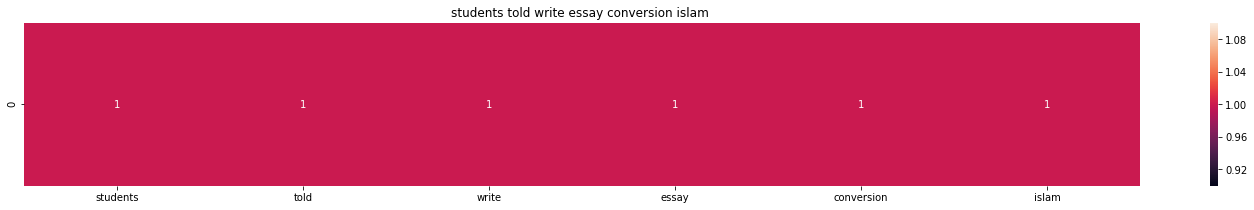

ID :  83260
Title :  students told write essay conversion islam 
Publication :  Fox News
Author :  Todd Starnes
Euclidean similarity with the query article : 0.0


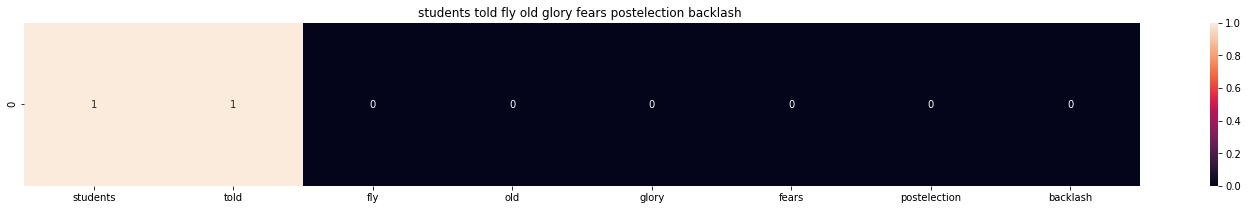

ID :  86966
Title :  students told fly old glory fears postelection backlash 
Publication :  Fox News
Author :  Todd Starnes
Euclidean similarity with the query article : 1.2554294145


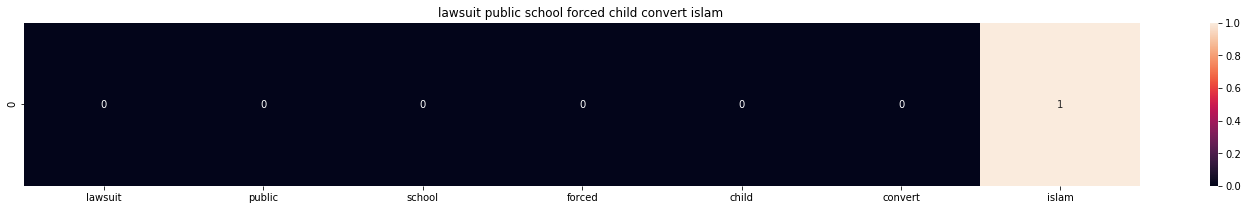

ID :  83261
Title :  lawsuit public school forced child convert islam 
Publication :  Fox News
Author :  Todd Starnes
Euclidean similarity with the query article : 1.28785450395


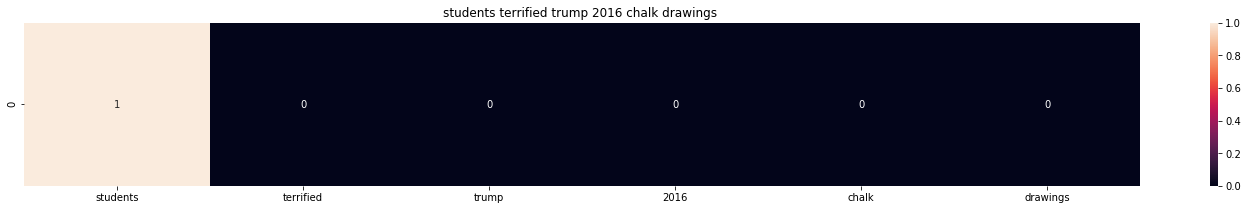

ID :  83680
Title :  students terrified trump 2016 chalk drawings 
Publication :  Fox News
Author :  Todd Starnes
Euclidean similarity with the query article : 1.32363711994


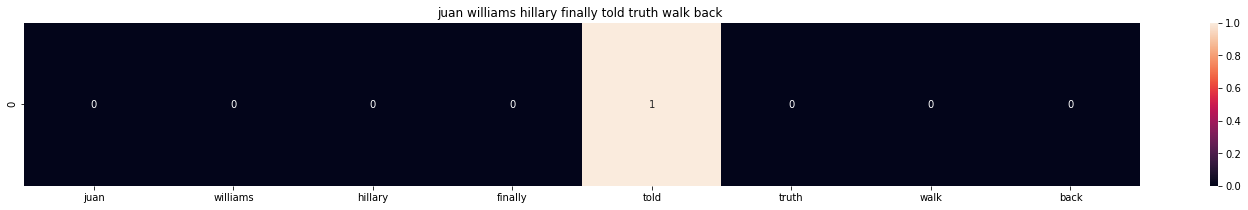

ID :  86079
Title :  juan williams hillary finally told truth walk back 
Publication :  Fox News
Author :  Juan Williams
Euclidean similarity with the query article : 1.32381100885


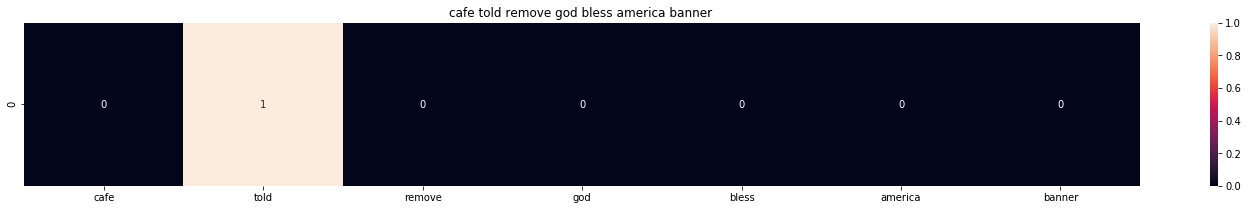

ID :  84935
Title :  cafe told remove god bless america banner 
Publication :  Fox News
Author :  Todd Starnes
Euclidean similarity with the query article : 1.3253370293


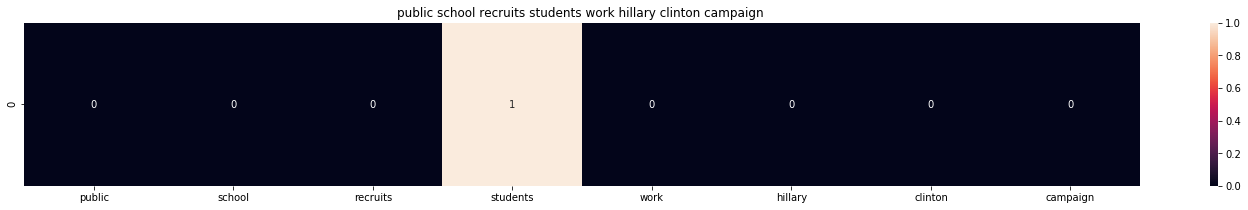

ID :  82671
Title :  public school recruits students work hillary clinton campaign 
Publication :  Fox News
Author :  Todd Starnes
Euclidean similarity with the query article : 1.32592072842


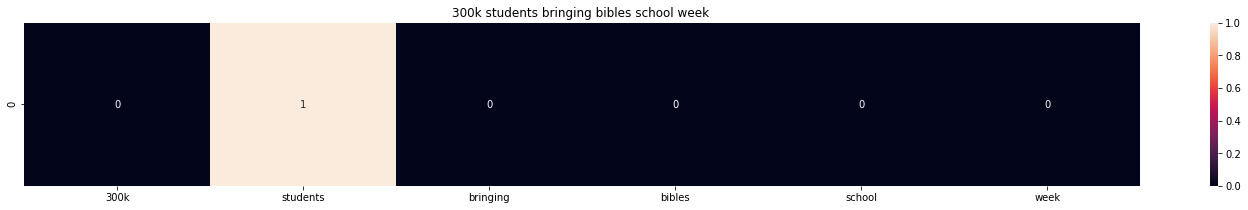

ID :  86306
Title :  300k students bringing bibles school week 
Publication :  Fox News
Author :  Jim Daly
Euclidean similarity with the query article : 1.32926330538


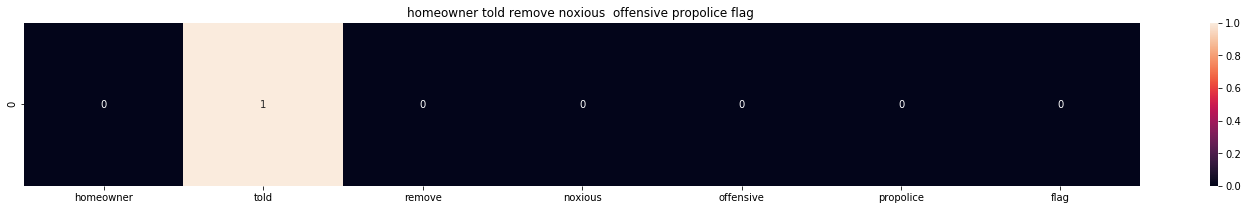

ID :  85777
Title :  homeowner told remove noxious  offensive propolice flag 
Publication :  Fox News
Author :  Todd Starnes
Euclidean similarity with the query article : 1.33011720248


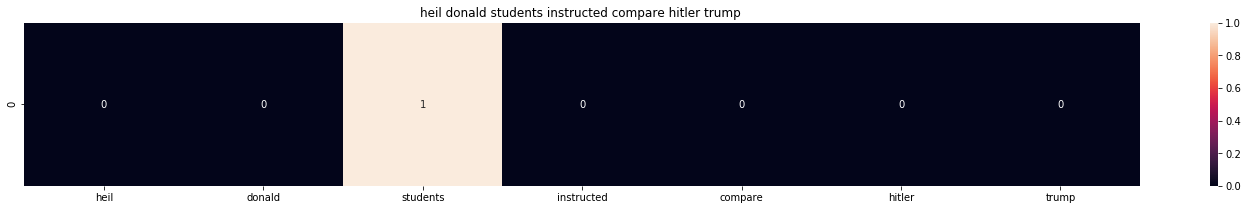

ID :  86128
Title :  heil donald students instructed compare hitler trump 
Publication :  Fox News
Author :  Todd Starnes
Euclidean similarity with the query article : 1.33304787356


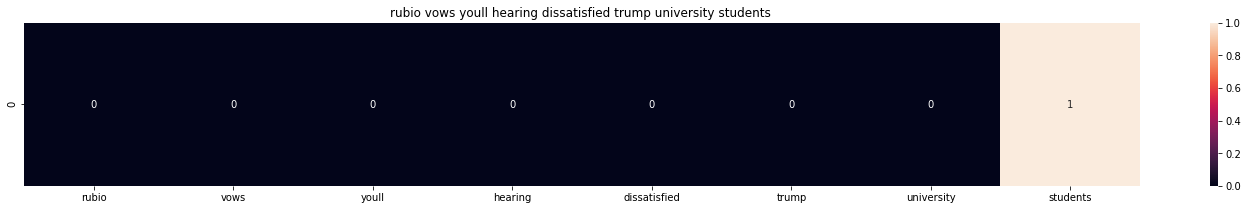

ID :  83293
Title :  rubio vows youll hearing dissatisfied trump university students 
Publication :  Fox News
Author :  Christopher Snyder
Euclidean similarity with the query article : 1.33818340496


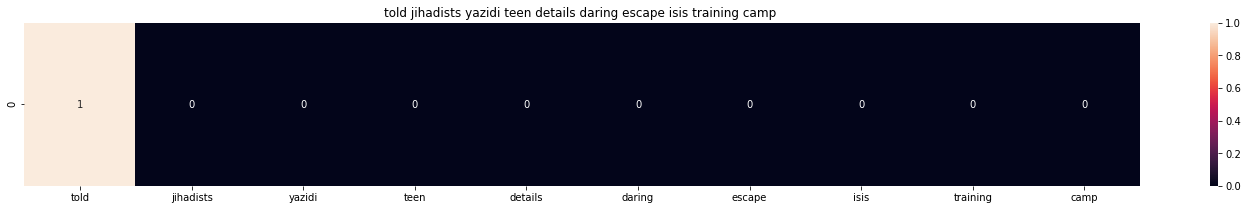

ID :  84637
Title :  told jihadists yazidi teen details daring escape isis training camp 
Publication :  Fox News
Author :  Hollie McKay
Euclidean similarity with the query article : 1.33895774342


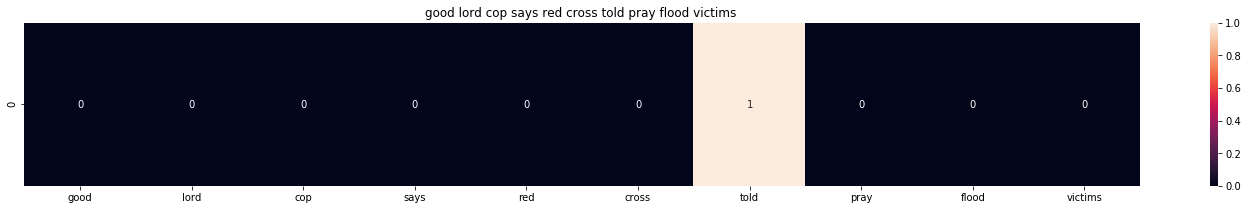

ID :  85700
Title :  good lord cop says red cross told pray flood victims 
Publication :  Fox News
Author :  Todd Starnes
Euclidean similarity with the query article : 1.33982452613


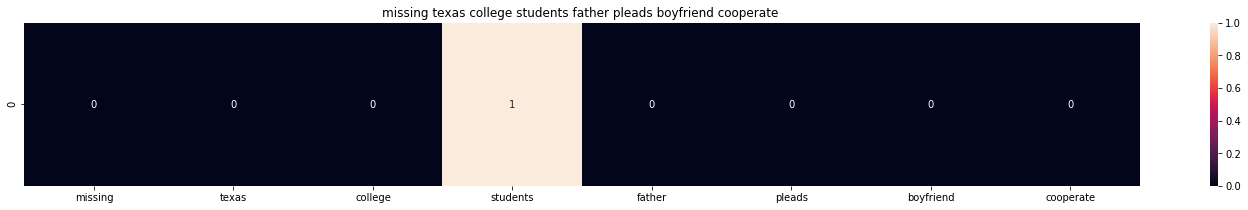

ID :  86574
Title :  missing texas college students father pleads boyfriend cooperate 
Publication :  Fox News
Author :  Cristina Corbin
Euclidean similarity with the query article : 1.34074470842


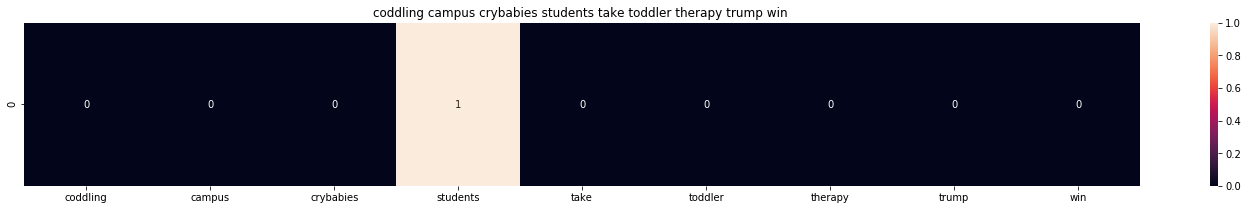

ID :  86963
Title :  coddling campus crybabies students take toddler therapy trump win 
Publication :  Fox News
Author :  Brooke Singman
Euclidean similarity with the query article : 1.3429819099


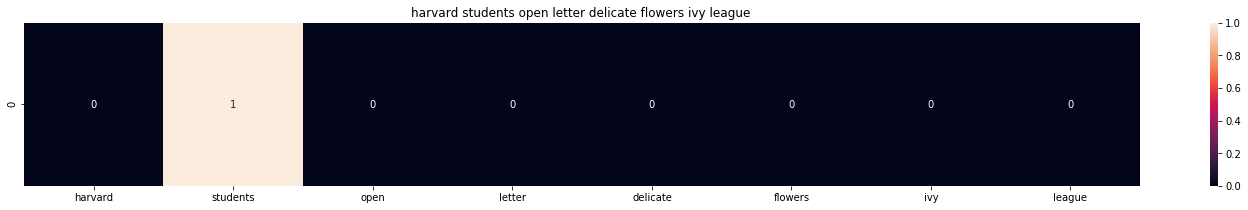

ID :  86967
Title :  harvard students open letter delicate flowers ivy league 
Publication :  Fox News
Author :  Jacob Russell
Euclidean similarity with the query article : 1.34506632017


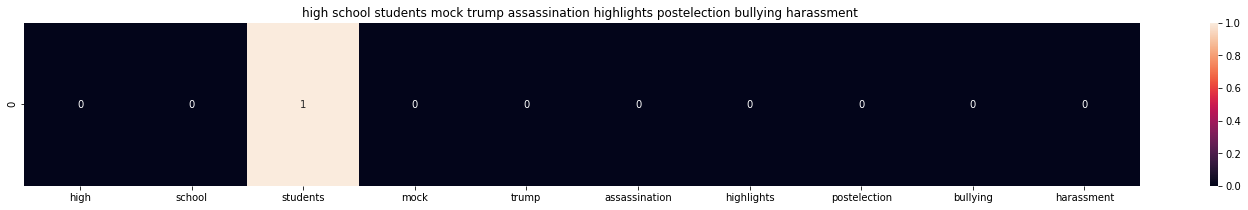

ID :  86988
Title :  high school students mock trump assassination highlights postelection bullying harassment 
Publication :  Fox News
Author :  Andrew O Reilly
Euclidean similarity with the query article : 1.34783206945


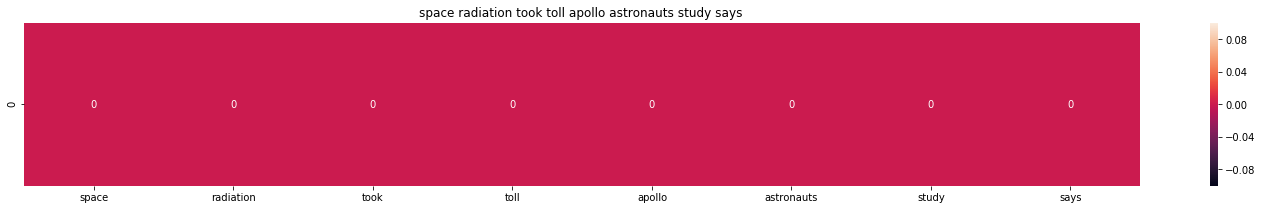

ID :  85318
Title :  space radiation took toll apollo astronauts study says 
Publication :  Fox News
Author :  Rob Verger
Euclidean similarity with the query article : 1.41421356237


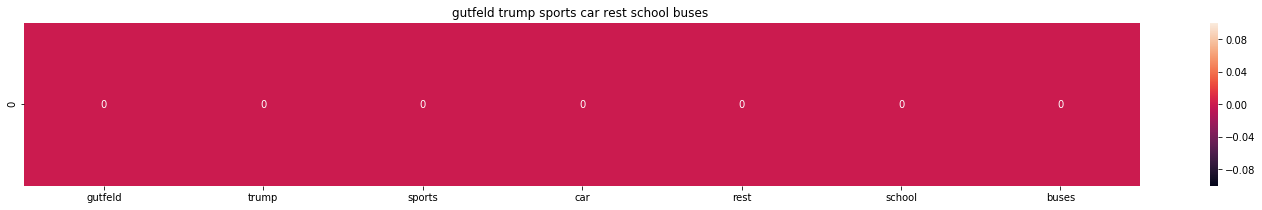

ID :  84221
Title :  gutfeld trump sports car rest school buses 
Publication :  Fox News
Author :  Greg Gutfeld
Euclidean similarity with the query article : 1.41421356237


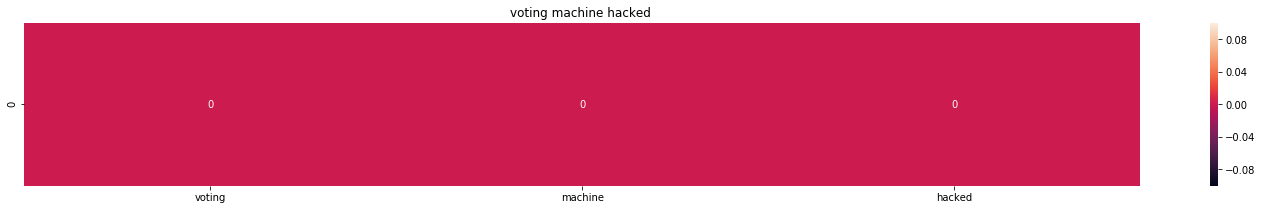

ID :  86085
Title :  voting machine hacked 
Publication :  Fox News
Author :  Eric Shawn
Euclidean similarity with the query article : 1.41421356237


In [30]:
def tfidf_model(doc_id, num_results):
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists = np.sort(pairwise_dist.flatten())[0:num_results]
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], 'bag_of_words')
        print('ID : ',data['id'].loc[df_indices[i]])
        print('Title : ',data['title'].loc[df_indices[i]])
        print('Publication : ',data['publication'].loc[df_indices[i]])
        print('Author : ',data['author'].loc[df_indices[i]])
        print ('Euclidean similarity with the query article :', pdists[i])
        print('='*60)
        
        
#Calling Bag of Words function
tfidf_model(150, 20)

## [3] IDF based article similarity

In [31]:
idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])
# idf_title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(courpus) returns the a sparase matrix of dimensions #data_points * #words_in_corpus
# idf_title_features[doc_id, index_of_word_in_corpus] = number of times the word occured in that doc

In [32]:
def n_containing(word):
    # return the number of documents which had the given word
    return sum(1 for blob in data['title'] if word in blob.split())

def idf(word):
    # idf = log(#number of docs / #number of docs which had the given word)
    return math.log(data.shape[0] / (n_containing(word)))

In [33]:
# we need to convert the values into float
idf_title_features  = idf_title_features.astype(np.float)

for i in idf_title_vectorizer.vocabulary_.keys():
    # for every word in whole corpus we will find its idf value
    idf_val = idf(i)
    
    # to calculate idf_title_features we need to replace the count values with the idf values of the word
    # idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0] will return all documents in which the word i present
    for j in idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0]:
        
        # we replace the count values of word i in document j with  idf_value of word i 
        # idf_title_features[doc_id, index_of_word_in_courpus] = idf value of word
        idf_title_features[j,idf_title_vectorizer.vocabulary_[i]] = idf_val
        

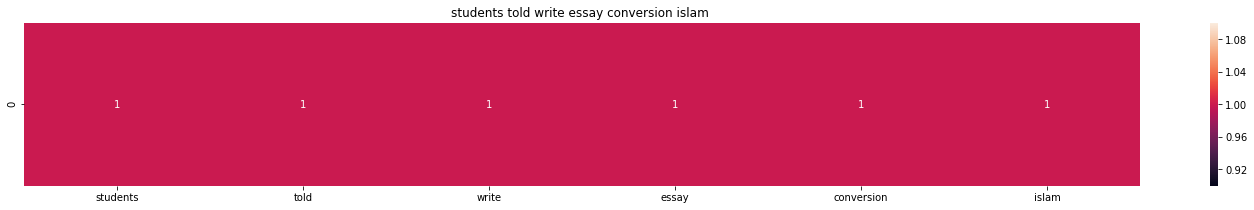

ID :  83260
Title :  students told write essay conversion islam 
Publication :  Fox News
Author :  Todd Starnes
Euclidean similarity with the query article : 0.0


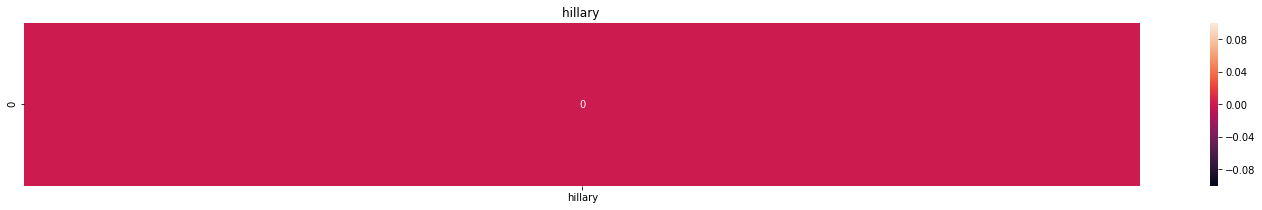

ID :  86160
Title :  hillary 
Publication :  Fox News
Author :  Chris Stirewalt
Euclidean similarity with the query article : 15.3212754091


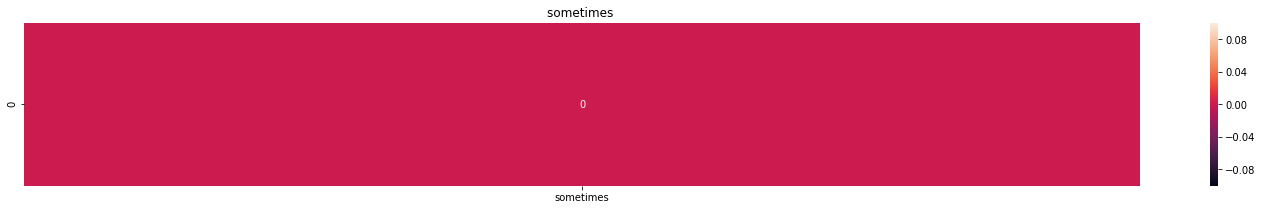

ID :  86826
Title :  sometimes 
Publication :  Fox News
Author :  Chris Stirewalt
Euclidean similarity with the query article : 16.5664851481


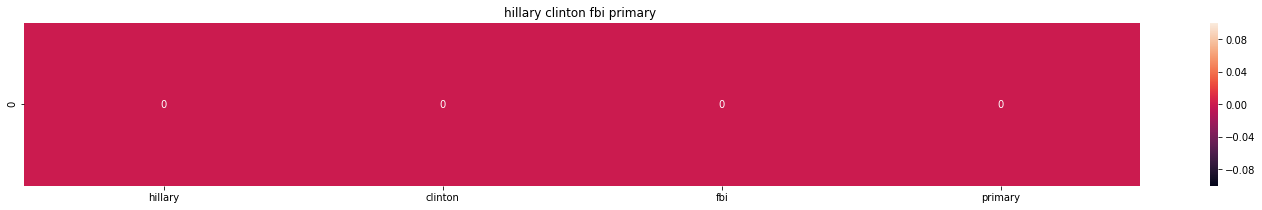

ID :  84613
Title :  hillary clinton fbi primary 
Publication :  Fox News
Author :  Cal Thomas
Euclidean similarity with the query article : 16.5854288666


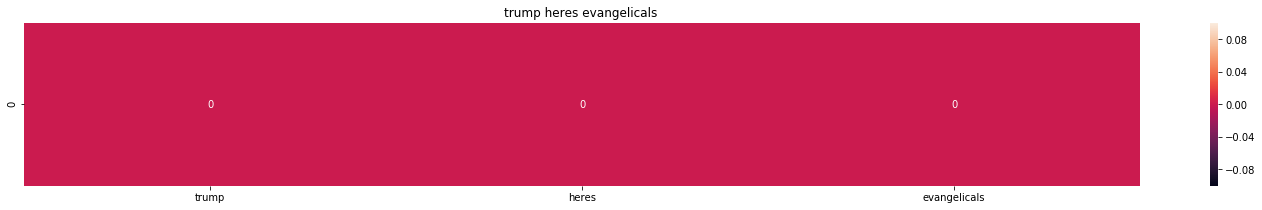

ID :  84174
Title :  trump heres evangelicals 
Publication :  Fox News
Author :  Bruce Ashford
Euclidean similarity with the query article : 16.8305338512


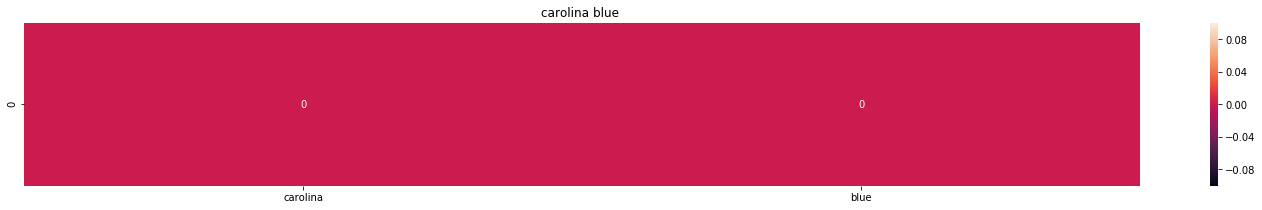

ID :  85911
Title :  carolina blue 
Publication :  Fox News
Author :  Chris Stirewalt
Euclidean similarity with the query article : 16.9901534581


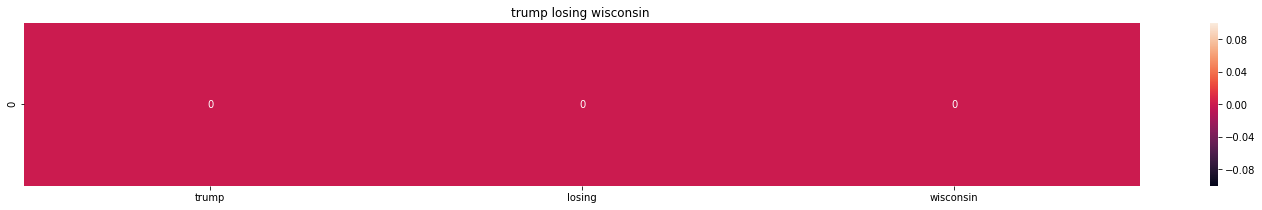

ID :  83777
Title :  trump losing wisconsin 
Publication :  Fox News
Author :  Chris Stirewalt
Euclidean similarity with the query article : 17.129348006


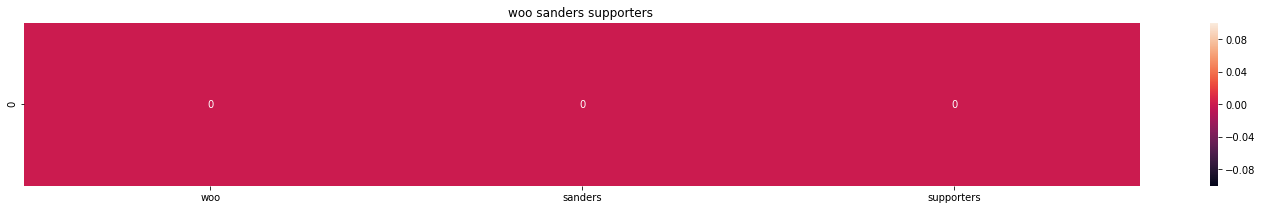

ID :  84629
Title :  woo sanders supporters 
Publication :  Fox News
Author :  Adam Shaw
Euclidean similarity with the query article : 17.2798248754


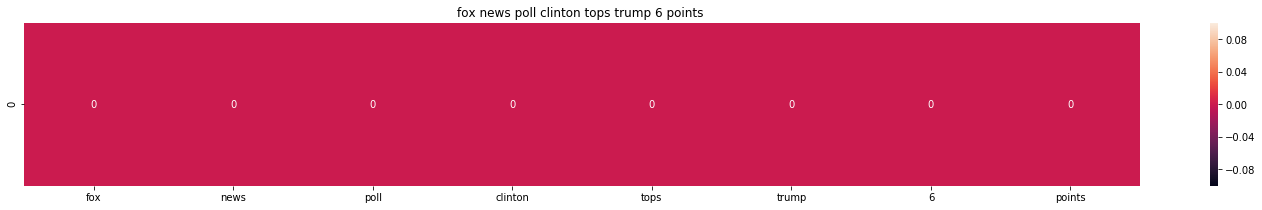

ID :  86480
Title :  fox news poll clinton tops trump 6 points 
Publication :  Fox News
Author :  Dana Blanton
Euclidean similarity with the query article : 17.3411652645


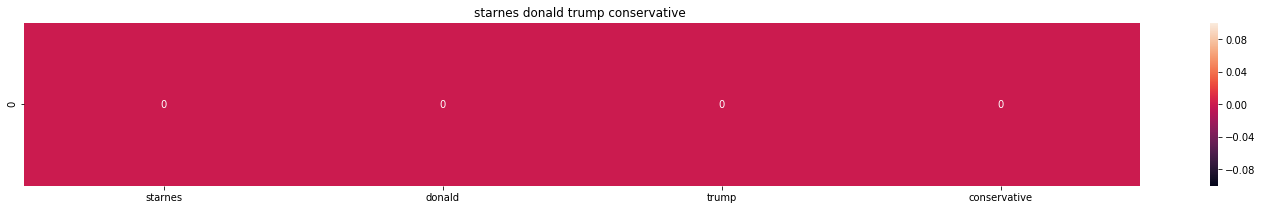

ID :  84053
Title :  starnes donald trump conservative 
Publication :  Fox News
Author :  Todd Starnes
Euclidean similarity with the query article : 17.342618082


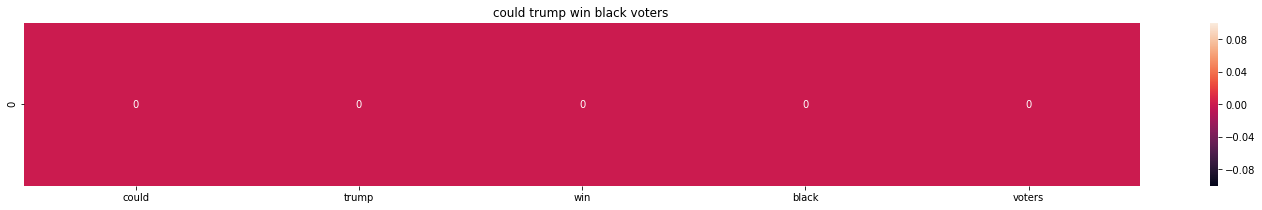

ID :  83448
Title :  could trump win black voters 
Publication :  Fox News
Author :  Joseph Weber
Euclidean similarity with the query article : 17.3578481173


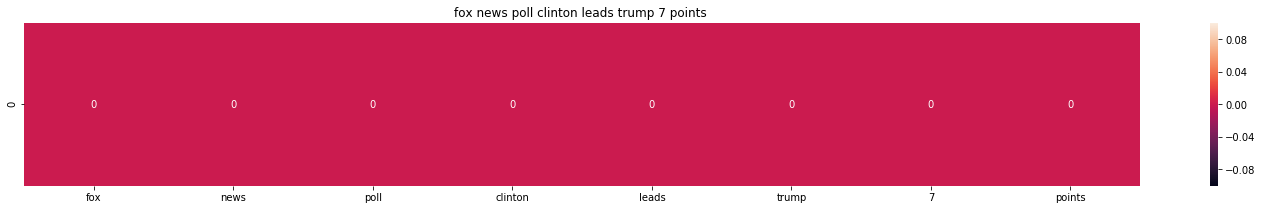

ID :  86387
Title :  fox news poll clinton leads trump 7 points 
Publication :  Fox News
Author :  Dana Blanton
Euclidean similarity with the query article : 17.3858999986


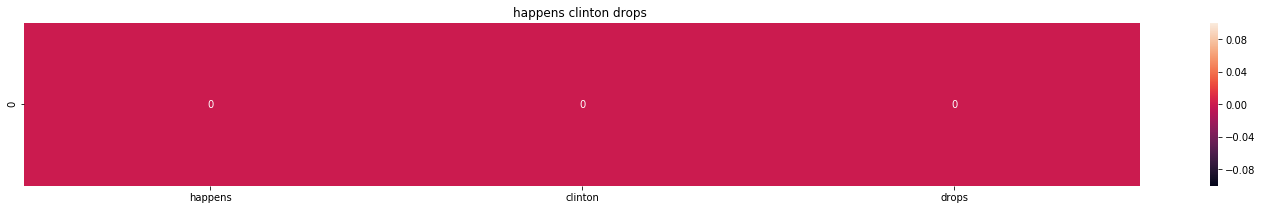

ID :  85976
Title :  happens clinton drops 
Publication :  Fox News
Author :  Adam Shaw
Euclidean similarity with the query article : 17.4992269868


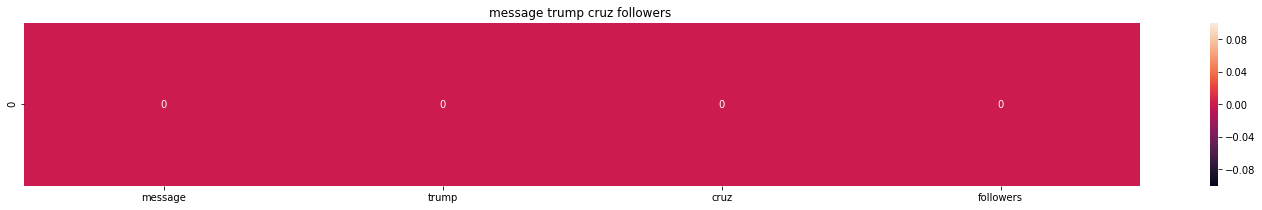

ID :  83776
Title :  message trump cruz followers 
Publication :  Fox News
Author :  Todd Starnes
Euclidean similarity with the query article : 17.6007410012


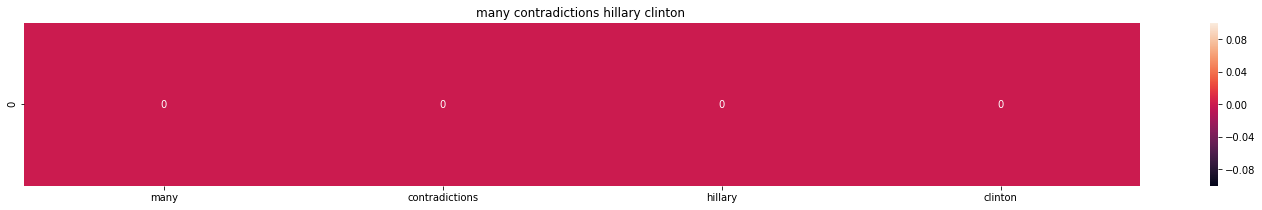

ID :  83563
Title :  many contradictions hillary clinton 
Publication :  Fox News
Author :  Jon Kraushar
Euclidean similarity with the query article : 17.6289766664


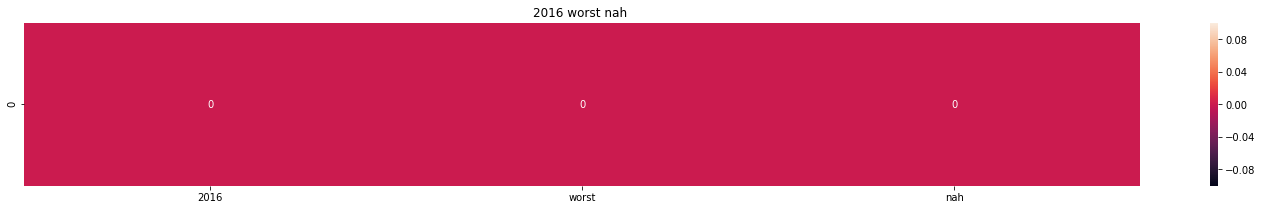

ID :  85728
Title :  2016 worst nah 
Publication :  Fox News
Author :  Chris Stirewalt
Euclidean similarity with the query article : 17.6336706517


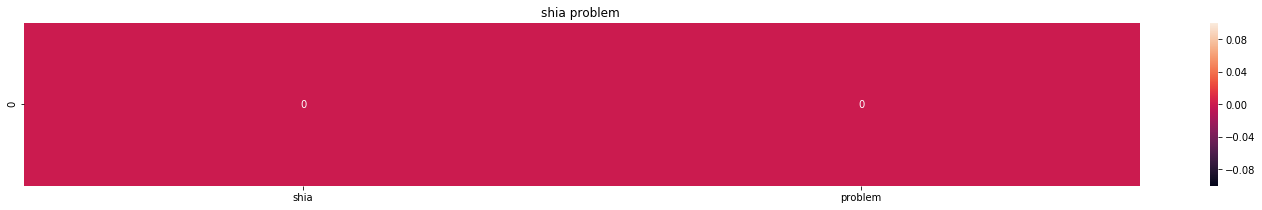

ID :  82637
Title :  shia problem 
Publication :  Fox News
Author :  Michael Desch
Euclidean similarity with the query article : 17.6937781149


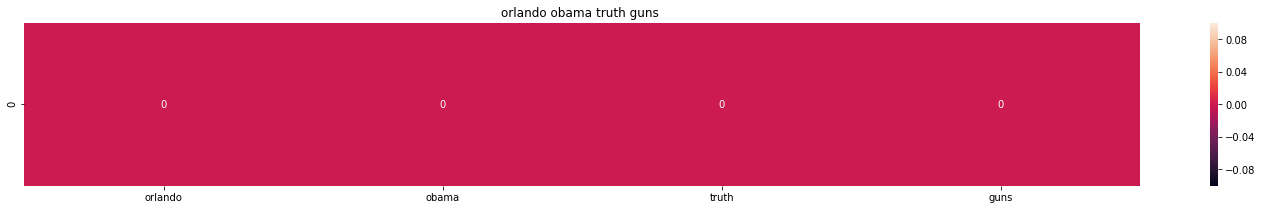

ID :  84818
Title :  orlando obama truth guns 
Publication :  Fox News
Author :  Cal Thomas
Euclidean similarity with the query article : 17.7579817392


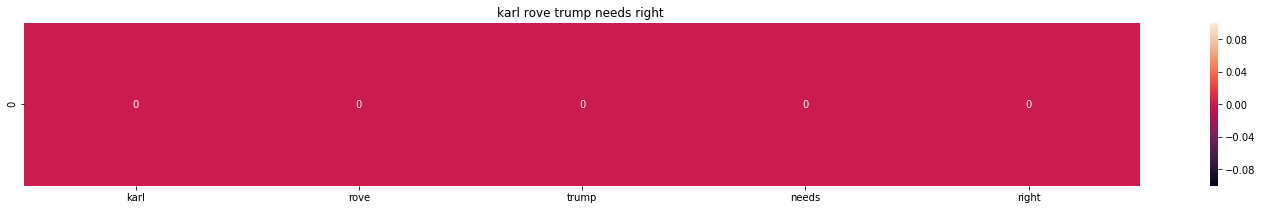

ID :  84205
Title :  karl rove trump needs right 
Publication :  Fox News
Author :  Karl Rove
Euclidean similarity with the query article : 17.8348057217


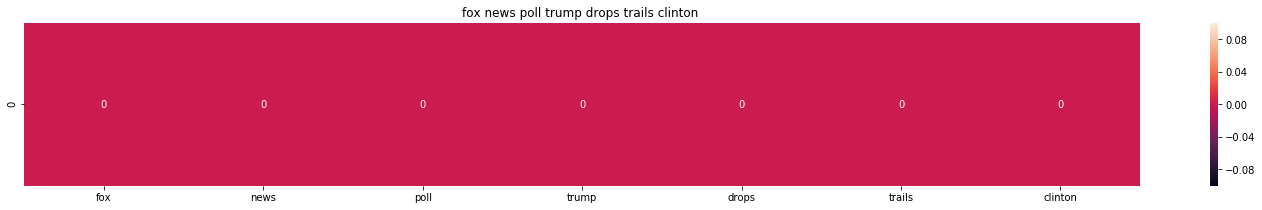

ID :  84643
Title :  fox news poll trump drops trails clinton 
Publication :  Fox News
Author :  Dana Blanton
Euclidean similarity with the query article : 17.8620953856


In [34]:
def idf_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(idf_title_features,idf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], 'bag_of_words')
        print('ID : ',data['id'].loc[df_indices[i]])
        print('Title : ',data['title'].loc[df_indices[i]])
        print('Publication : ',data['publication'].loc[df_indices[i]])
        print('Author : ',data['author'].loc[df_indices[i]])
        print ('Euclidean similarity with the query article :', pdists[i])
        print('='*60)

        
        
idf_model(150, 20)
# in the output heat map each value represents the idf values of the label word, the color represents the intersection with inputs title

## [4] Text Semantics based article similarity

In [ ]:

# credits: https://www.kaggle.com/c/word2vec-nlp-tutorial#part-2-word-vectors
# Custom Word2Vec using your own text data.
# Do NOT RUN this code.
# It is meant as a reference to build your own Word2Vec when you have 
# lots of data.

'''
# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 1    # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print ("Training model...")
model = word2vec.Word2Vec(sen_corpus, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context)
    
'''

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.

model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)


In [ ]:
# Utility functions

def get_word_vec(sentence, doc_id, m_name):
    # sentence : title/body of the article
    # doc_id: document id in our corpus
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)
    vec = []
    for i in sentence.split():
        if i in vocab:
            if m_name == 'weighted' and i in  idf_title_vectorizer.vocabulary_:
                vec.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[i]] * model[i])
            elif m_name == 'avg':
                vec.append(model[i])
        else:
            # if the word in our courpus is not there in the google word2vec corpus, we are just ignoring it
            vec.append(np.zeros(shape=(300,)))
    # we will return a numpy array of shape (#number of words in title * 300 ) 300 = len(w2v_model[word])
    # each row represents the word2vec representation of each word (weighted/avg) in given sentance 
    return  np.array(vec)

def get_distance(vec1, vec2):
    # vec1 = np.array(#number_of_words_title1 * 300), each row is a vector of length 300 corresponds to each word in give title
    # vec2 = np.array(#number_of_words_title2 * 300), each row is a vector of length 300 corresponds to each word in give title
    
    final_dist = []
    # for each vector in vec1 we caluclate the distance(euclidean) to all vectors in vec2
    for i in vec1:
        dist = []
        for j in vec2:
            # np.linalg.norm(i-j) will result the euclidean distance between vectors i, j
            dist.append(np.linalg.norm(i-j))
        final_dist.append(np.array(dist))
    # final_dist = np.array(#number of words in title1 * #number of words in title2)
    # final_dist[i,j] = euclidean distance between vectors i, j
    return np.array(final_dist)


def heat_map_w2v(sentence1, sentence2, url, doc_id1, doc_id2, model):
    # sentance1 : title1, input article
    # sentance2 : title2, recommended article
    # doc_id1: document id of input article
    # doc_id2: document id of recommended article
    # model: it can have two values, 1. avg 2. weighted
    
    #s1_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s1_vec = get_word_vec(sentence1, doc_id1, model)
    #s2_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s2_vec = get_word_vec(sentence2, doc_id2, model)

    # s1_s2_dist = np.array(#number of words in title1 * #number of words in title2)
    # s1_s2_dist[i,j] = euclidean distance between words i, j
    s1_s2_dist = get_distance(s1_vec, s2_vec)

    
    
    # devide whole figure into 2 parts 1st part displays heatmap 2nd part displays image of apparel
    gs = gridspec.GridSpec(1, 1) 
    fig = plt.figure(figsize=(15,15))
    
    ax = plt.subplot(gs[0])
    # ploting the heap map based on the pairwise distances
    ax = sns.heatmap(np.round(s1_s2_dist,4), annot=True)
    # set the x axis labels as recommended apparels title
    ax.set_xticklabels(sentence2.split())
    # set the y axis labels as input apparels title
    ax.set_yticklabels(sentence1.split())
    # set title as recommended apparels title
    ax.set_title(sentence2)
    
    plt.show()

In [ ]:
# vocab = stores all the words that are there in google w2v model
# vocab = model.wv.vocab.keys() # if you are using Google word2Vec

vocab = model.keys()
# this function will add the vectors of each word and returns the avg vector of given sentance
def build_avg_vec(sentence, num_features, doc_id, m_name):
    # sentace: its title/body of the article
    # num_features: the lenght of word2vec vector, its values = 300
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)

    featureVec = np.zeros((num_features,), dtype="float32")
    # we will intialize a vector of size 300 with all zeros
    # we add each word2vec(wordi) to this fetureVec
    nwords = 0
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  idf_title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[word]] * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    # returns the avg vector of given sentance, its of shape (1, 300)
    return featureVec

#### Average Word2Vec article similarity

In [ ]:
doc_id = 0
w2v_title = []
# for every title we build a avg vector representation
for i in data['title']:
    w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
    doc_id += 1

# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title = np.array(w2v_title)


In [ ]:
def avg_w2v_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # dist(x, y) = sqrt(dot(x, x) - 2 * dot(x, y) + dot(y, y))
    pairwise_dist = pairwise_distances(w2v_title, w2v_title[doc_id].reshape(1,-1))

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], indices[0], indices[i], 'avg')
        print('ID : ',data['id'].loc[df_indices[i]])
        print('Title : ',data['title'].loc[df_indices[i]])
        print('Publication : ',data['publication'].loc[df_indices[i]])
        print('Author : ',data['author'].loc[df_indices[i]])
        print ('Euclidean similarity with the query article :', pdists[i])
        print('='*60)
        
avg_w2v_model(150, 20)
# in the give heat map, each cell contains the euclidean distance between words i, j